Exercises

The end result of this exercise should be a Jupyter notebook named model.

Using saas.csv or log data from API usage or store_item_sales

Split data (train/test) and resample by any period, except daily, and aggregate using the sum.
Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
Simple Average
Moving Average
Holt's Linear Trend Model
Based on previous year/month/etc., this is up to you.
Optional: Using store item demand

# Revised in class exercise was to use a dataset of our choice to forecast, plot, and evalute. 

# I used the Fitbit dataset see the Fitbit.ipynb

# Creating and testing explore.py and model.py

In [1]:
import acquire
import prepare
import explore
import model


# set chart defaults
explore.set_plotting_defaults()

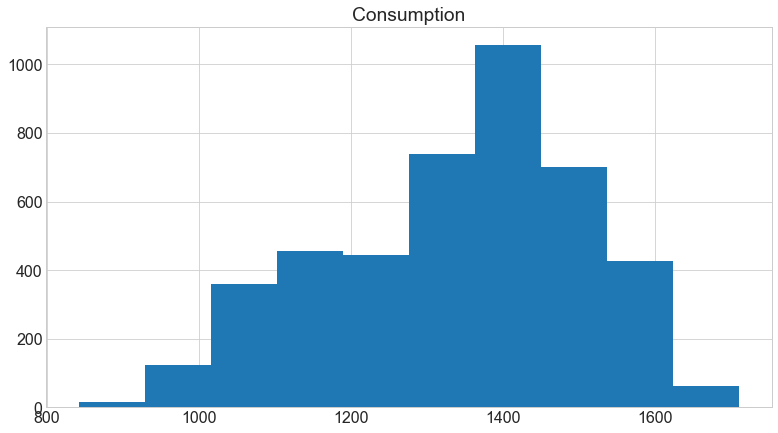

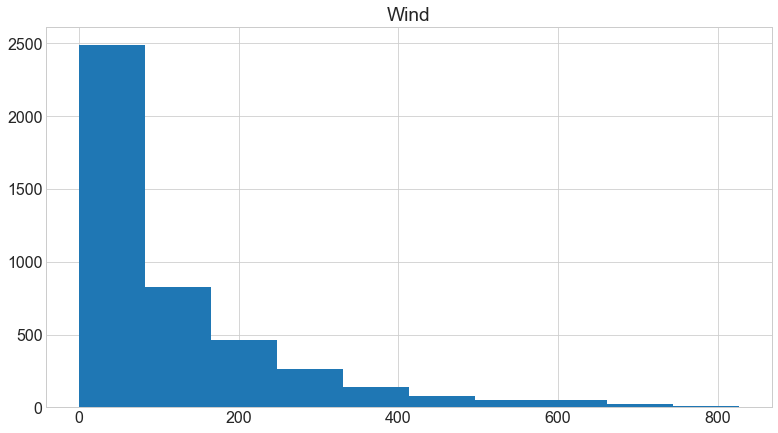

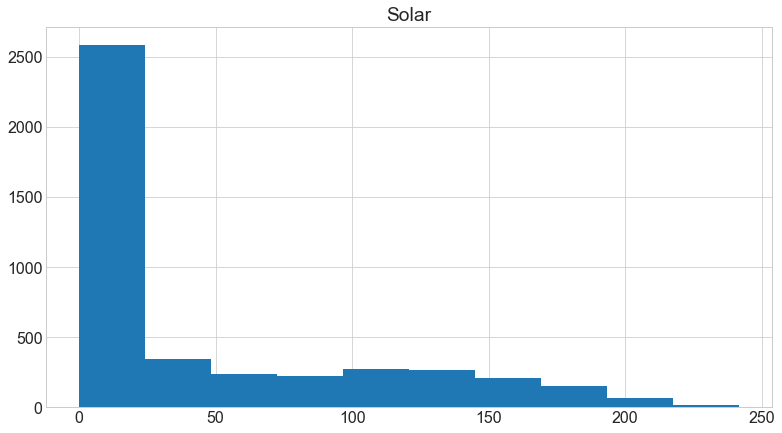

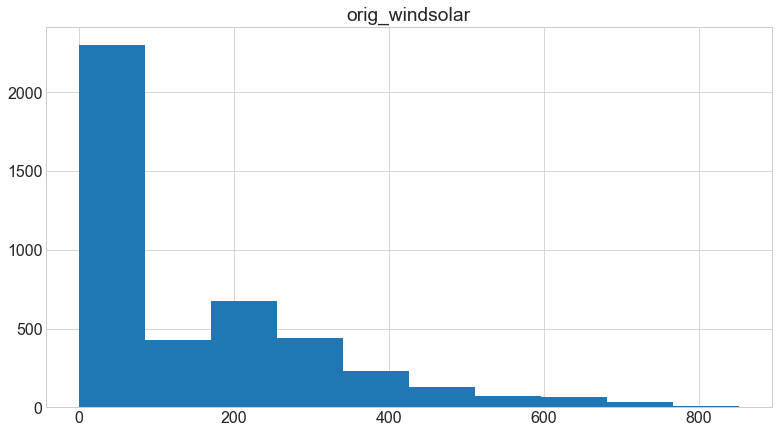

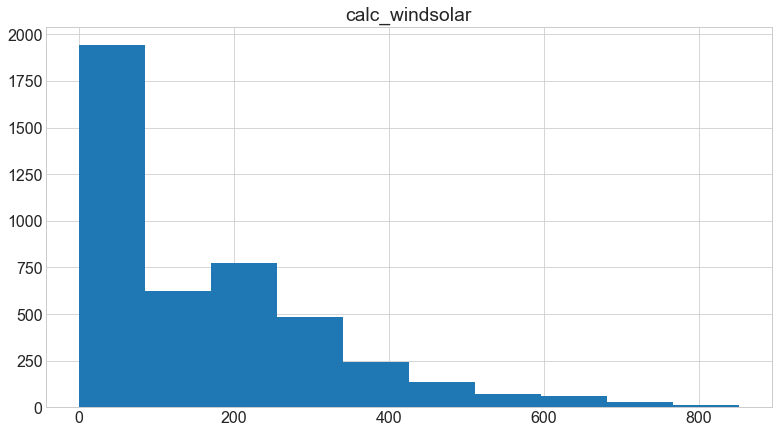

In [2]:
gdf = acquire.germany_daily()
gdf = prepare.prep_germany_data(gdf)

In [3]:
gdf.head()

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0,0.0


In [4]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Consumption     4383 non-null   float64
 1   Wind            4383 non-null   float64
 2   Solar           4383 non-null   float64
 3   orig_windsolar  4383 non-null   float64
 4   calc_windsolar  4383 non-null   float64
dtypes: float64(5)
memory usage: 205.5 KB


In [5]:
check_windsolar = gdf[gdf.orig_windsolar != gdf.calc_windsolar]
check_windsolar

,Consumption,Wind,Solar,orig_windsolar,calc_windsolar
Date,,,,,
2010-01-01,1057.37200,48.709,0.000,0.000,48.709
2010-01-02,1161.04200,24.628,0.000,0.000,24.628
2010-01-03,1132.06900,22.963,0.000,0.000,22.963
2010-01-04,1346.25000,59.318,0.000,0.000,59.318
2010-01-05,1457.37400,41.624,0.000,0.000,41.624
...,...,...,...,...,...
2017-12-24,1141.75730,812.422,9.949,822.371,822.371
2017-12-25,1111.28338,587.810,15.765,603.575,603.575
2017-12-26,1130.11683,717.453,30.923,748.376,748.376


**NOTE:** the original windsolar and calculated windsolar only match about half the time     
- 2189 observations match
- 2194 observation DO NOT match


In [6]:
train, validate, test = explore.split_data(gdf)

In [7]:
explore.sanity_check_split(gdf, train, validate, test)

df lengths add to total: True
1st row of full df == 1st row train:             Consumption  Wind  Solar  orig_windsolar  calc_windsolar
Date                                                                
2006-01-01         True  True   True            True            True

 Is the last row of train the day before the first row of validate? And the same for validate to test?
            Consumption     Wind  Solar  orig_windsolar  calc_windsolar
Date                                                                   
2011-12-31     1077.625   83.185  0.000           0.000          83.185
2012-01-01      948.128  227.465  6.587         234.052         234.052
            Consumption    Wind    Solar  orig_windsolar  calc_windsolar
Date                                                                    
2015-08-06     1389.743  94.690  190.600         285.290         285.290
2015-08-07     1363.039  73.113  176.365         249.478         249.478

 Is the last row of test the same as the 

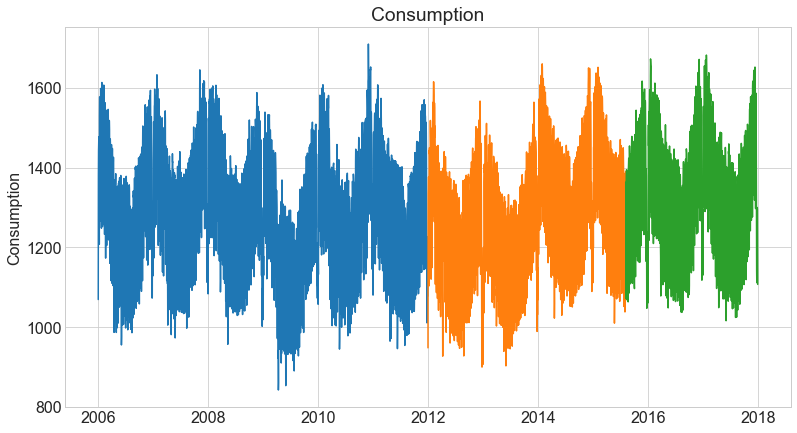

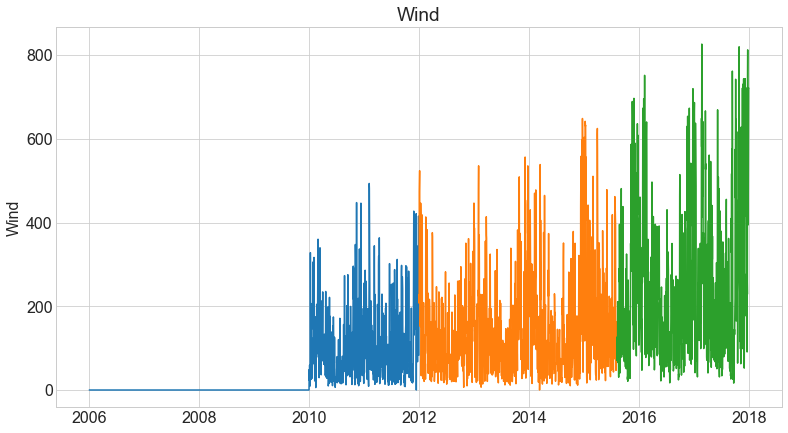

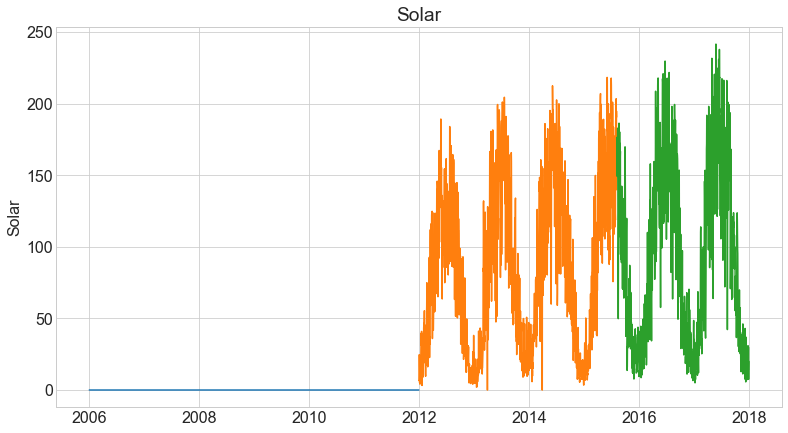

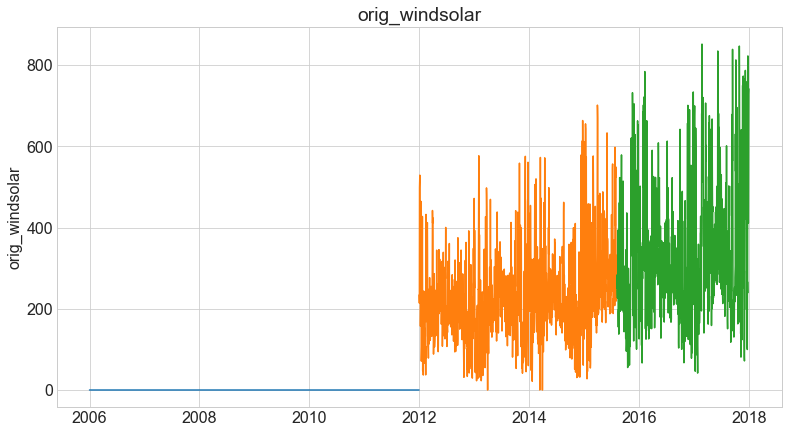

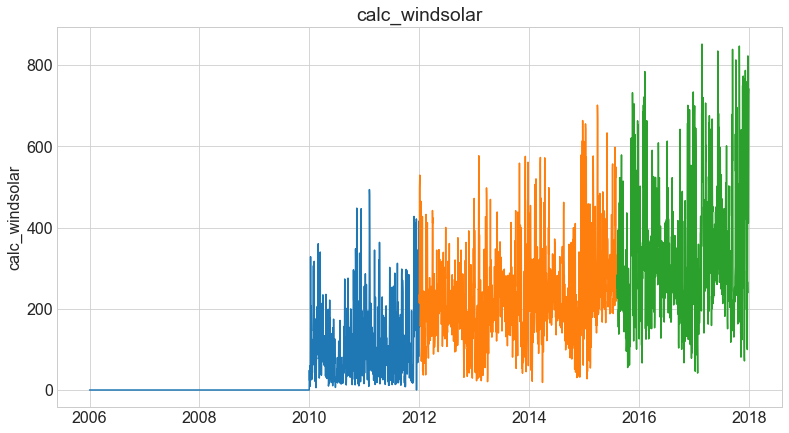

In [8]:
explore.chart_splits(train, validate, test)

# EXPLORE

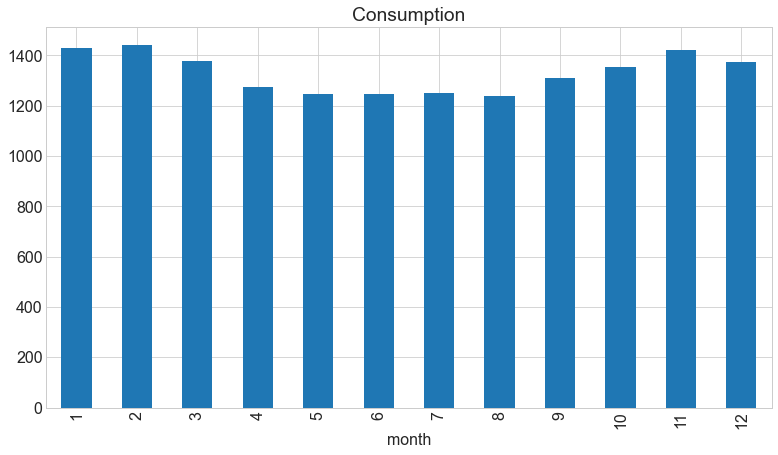

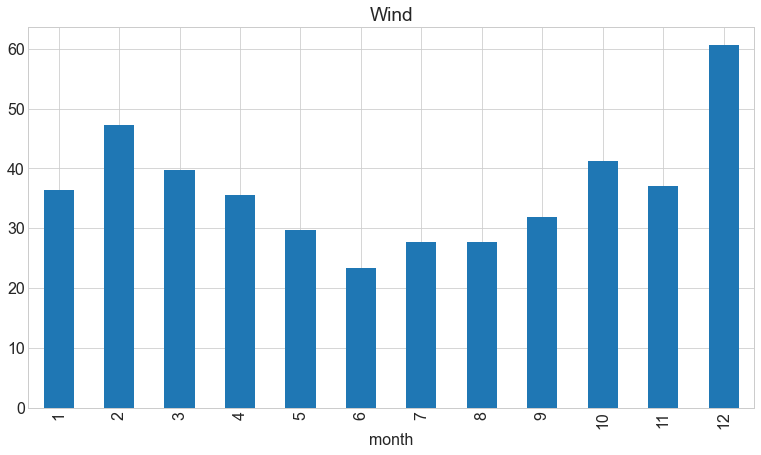

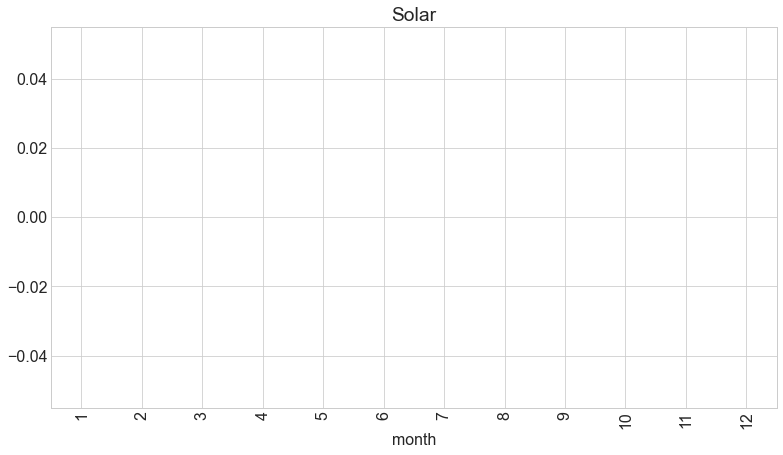

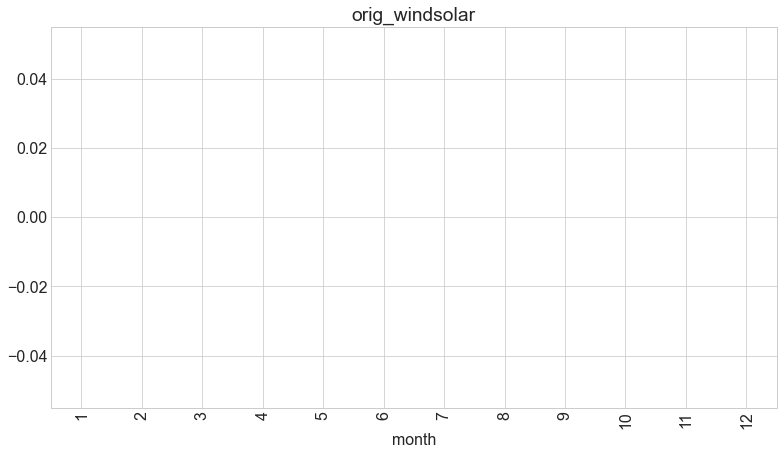

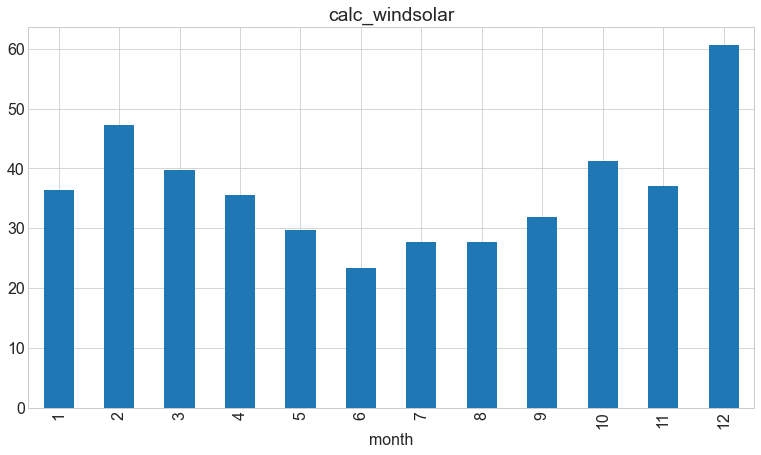

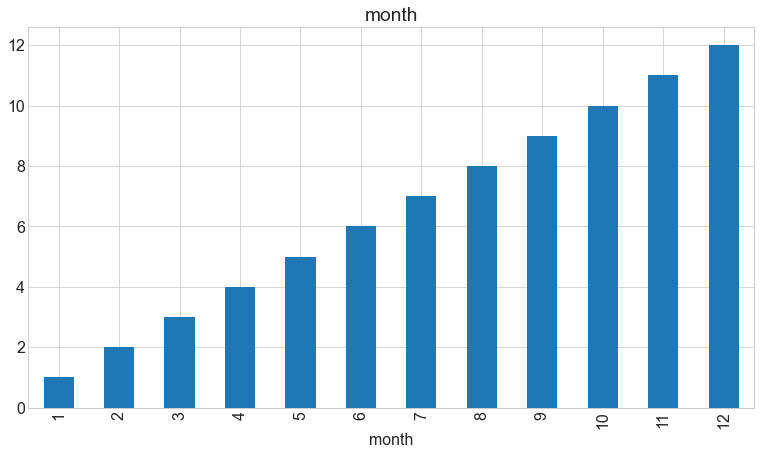

In [14]:
explore.bar_plots(train)

In [12]:
train.Solar

Date
2006-01-01    0.0
2006-01-02    0.0
2006-01-03    0.0
2006-01-04    0.0
2006-01-05    0.0
             ... 
2011-12-27    0.0
2011-12-28    0.0
2011-12-29    0.0
2011-12-30    0.0
2011-12-31    0.0
Name: Solar, Length: 2191, dtype: float64

**NOTE:** the solar and original windsolar columns are all 0 in the train dataset      
- evidently they are recent addtions and so only have values in the validate and test datasets if percentage or human date split is used
- might need to try an alternative split method from sklearn if we want data from all columns in both sets
- see: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
- for now will limit exploration to just consumption instead

In [15]:
# assign target variable/s
y = train.Consumption